# 데이터 합치기 (2019 ~ 2021)
### 파일 병합

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib
import os

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

In [107]:
# 파일 경로
file_paths = [
    './train_data/data_v2/2019.csv',
    './train_data/data_v2/2020.csv',
    './train_data/data_v2/2021.csv'
]

dfs = [pd.read_csv(file) for file in file_paths]
merged_df = pd.concat(dfs, ignore_index=True)
display(merged_df.head())

C:\Users\sangi\AppData\Local\Temp\ipykernel_20076\1850121775.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(file) for file in file_paths]
C:\Users\sangi\AppData\Local\Temp\ipykernel_20076\1850121775.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(file) for file in file_paths]
C:\Users\sangi\AppData\Local\Temp\ipykernel_20076\1850121775.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(file) for file in file_paths]


,RUN_DT,TRN_NO,UP_DN_DV_CD,TRN_CLSF_CD,RUN_DV_CD,ORG_STN_CD,TRN_ORG_TM,TMN_STN_CD,TRN_TMN_TM,DALC_FLG,TRN_ATT_CD,DVD_ANX_DV_CD,RUN_ELPS_DNO,BIZ_FLG,BF_CPS_OPN_FLG,AFT_CPS_OPN_FLG,CPS_RDIR_FLG,PRC_CL_CD,MRNT_CD
0,20190101,1001,D,8,1,3900023,61600,3900114,105500,N,1,NaN,0,Y,Y,N,Y,81.0,01
1,20190101,1002,U,8,1,3900114,62400,3900023,110500,N,1,NaN,0,Y,Y,N,N,81.0,01
2,20190101,1003,D,8,1,3900023,91600,3900114,135600,N,1,NaN,0,Y,Y,N,N,81.0,01
3,20190101,1004,U,8,1,3900114,91500,3900023,135400,N,1,NaN,0,Y,Y,N,N,81.0,01
4,20190101,1005,D,8,1,3900023,110500,3900114,154700,N,1,NaN,0,Y,Y,N,Y,81.0,01


In [86]:
merged_df.to_csv('./train_data/data_v2/19_21.csv', index=False)

---

# v1
### 컬럼명 변경

In [116]:
file_path = "./train_data/data_v2/19_21.csv"
df = pd.read_csv(file_path)

column_translation = {
    "RUN_DT": "운행일자",
    "TRN_NO": "열차번호",
    "UP_DN_DV_CD": "상행하행구분코드",
    "TRN_CLSF_CD": "열차종별코드",
    "RUN_DV_CD": "운행구분코드",
    "ORG_STN_CD": "시발역코드",
    "TRN_ORG_TM": "열차시발시각",
    "TMN_STN_CD": "종착역코드",
    "TRN_TMN_TM": "열차종착시각",
    "DALC_FLG": "회송여부",
    "TRN_ATT_CD": "열차속성코드",
    "DVD_ANX_DV_CD": "분할병합구분코드",
    "RUN_ELPS_DNO": "운행경과일수",
    "BIZ_FLG": "영업여부",
    "BF_CPS_OPN_FLG": "이전편성공개여부",
    "AFT_CPS_OPN_FLG": "이후편성공개여부",
    "CPS_RDIR_FLG": "편성순방향여부",
    "PRC_CL_CD": "운임등급코드",
    "MRNT_CD": "주운행성코드"
}

df.rename(columns=column_translation, inplace=True)

output_path = "./train_data/data_v2/19_21_v1.csv"
df.to_csv(output_path, index=False)

df

C:\Users\sangi\AppData\Local\Temp\ipykernel_20076\4125115186.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,운행일자,열차번호,상행하행구분코드,열차종별코드,운행구분코드,시발역코드,열차시발시각,종착역코드,열차종착시각,회송여부,열차속성코드,분할병합구분코드,운행경과일수,영업여부,이전편성공개여부,이후편성공개여부,편성순방향여부,운임등급코드,주운행성코드
0,20190101,1001,D,8,1,3900023,61600,3900114,105500,N,1,NaN,0,Y,Y,N,Y,81.0,01
1,20190101,1002,U,8,1,3900114,62400,3900023,110500,N,1,NaN,0,Y,Y,N,N,81.0,01
2,20190101,1003,D,8,1,3900023,91600,3900114,135600,N,1,NaN,0,Y,Y,N,N,81.0,01
3,20190101,1004,U,8,1,3900114,91500,3900023,135400,N,1,NaN,0,Y,Y,N,N,81.0,01
4,20190101,1005,D,8,1,3900023,110500,3900114,154700,N,1,NaN,0,Y,Y,N,Y,81.0,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664405,20210630,847,D,10,1,3900023,183100,3900580,210600,N,1,NaN,0,Y,Y,N,N,101.0,N1
664406,20210630,848,U,10,1,3900580,213000,3900023,1100,N,1,NaN,1,Y,Y,N,N,101.0,N1
664407,20210630,9,D,0,1,3900023,70000,3900114,93800,N,1,NaN,0,Y,Y,N,N,1.0,01
664408,20210630,9237,D,7,1,3900023,92500,3901040,114800,N,1,1.0,0,Y,Y,N,N,71.0,8B


---

# V2
### 결측값 제거, 필요한 데이터로만 정리

In [ ]:
file_path = "./train_data/data_v2/19_21_v1.csv"
df = pd.read_csv(file_path)

# 결측값 개수 확인
missing_values = df.isnull().sum()

# 결측값이 있는 컬럼만 출력
missing_values = missing_values[missing_values > 0]

if missing_values.empty:
    print(" 결측값이 없습니다.")
else:
    print("결측값이 있는 컬럼 목록:\n", missing_values)
    print("\n 총 결측값 개수:", missing_values.sum())

    # 결측값이 포함된 행 출력 (일부만 확인)
    print("\n 결측값이 포함된 데이터 샘플:")
    display(df[df.isnull().any(axis=1)].head())

C:\Users\sangi\AppData\Local\Temp\ipykernel_20076\4200796396.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


결측값이 있는 컬럼 목록:
 분할병합구분코드    613918
이전편성공개여부         2
이후편성공개여부         2
편성순방향여부      31812
운임등급코드           2
dtype: int64

 총 결측값 개수: 645736

 결측값이 포함된 데이터 샘플:


,운행일자,열차번호,상행하행구분코드,열차종별코드,운행구분코드,시발역코드,열차시발시각,종착역코드,열차종착시각,회송여부,열차속성코드,분할병합구분코드,운행경과일수,영업여부,이전편성공개여부,이후편성공개여부,편성순방향여부,운임등급코드,주운행성코드
0,20190101,1001,D,8,1,3900023,61600,3900114,105500,N,1,NaN,0,Y,Y,N,Y,81.0,01
1,20190101,1002,U,8,1,3900114,62400,3900023,110500,N,1,NaN,0,Y,Y,N,N,81.0,01
2,20190101,1003,D,8,1,3900023,91600,3900114,135600,N,1,NaN,0,Y,Y,N,N,81.0,01
3,20190101,1004,U,8,1,3900114,91500,3900023,135400,N,1,NaN,0,Y,Y,N,N,81.0,01
4,20190101,1005,D,8,1,3900023,110500,3900114,154700,N,1,NaN,0,Y,Y,N,Y,81.0,01


운행일자             0
열차번호             0
상행하행구분코드         0
열차종별코드           0
운행구분코드           0
시발역코드            0
열차시발시각           0
종착역코드            0
열차종착시각           0
회송여부             0
열차속성코드           0
분할병합구분코드    613918
운행경과일수           0
영업여부             0
이전편성공개여부         2
이후편성공개여부         2
편성순방향여부      31812
운임등급코드           2
주운행성코드           0
dtype: int64

In [ ]:
file_path = "./train_data/data_v2/19_21_v1.csv"
df = pd.read_csv(file_path)

# 결측값 제거
# '분할변합구분코드'  EDA 생성에 필요없는 데이터일 뿐더러, 결측치가 전체의 92.4% 이기 때문에 거의 없는 데이터 열이나 마찬가지라 drop 처리
df.drop(columns=["분할병합구분코드"], inplace=True)

# '편성순방향여부' 결측치가 전체값의 5% 이지만 단순 기관사의 위치가 열차의 앞방향이냐 뒤방향이나 차이이기 때문에 drop 처리
df.drop(columns=["편성순방향여부"], inplace=True)

# 인사이트 도출에 필요없는 컬럼 제거
df.drop(columns=["이후편성공개여부"], inplace=True)
df.drop(columns=["이전편성공개여부"], inplace=True)
df.drop(columns=["운임등급코드"], inplace=True)
df.drop(columns=["영업여부"], inplace=True)
df.drop(columns=["운행경과일수"], inplace=True)
df.drop(columns=["회송여부"], inplace=True)
df.drop(columns=["열차번호"], inplace=True)

# 새로운 파일 저장
output_path = "./train_data/data_v2/19_21_v2.csv"
df.to_csv(output_path, index=False)

C:\Users\sangi\AppData\Local\Temp\ipykernel_20076\963184518.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [117]:
file_path = "./train_data/data_v2/19_21_v2.csv"
df = pd.read_csv(file_path)

df.info()
df.describe()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664410 entries, 0 to 664409
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   운행일자      664410 non-null  int64 
 1   상행하행구분코드  664410 non-null  object
 2   열차종별코드    664410 non-null  int64 
 3   운행구분코드    664410 non-null  int64 
 4   시발역코드     664410 non-null  int64 
 5   열차시발시각    664410 non-null  int64 
 6   종착역코드     664410 non-null  int64 
 7   열차종착시각    664410 non-null  int64 
 8   열차속성코드    664410 non-null  int64 
 9   주운행성코드    664410 non-null  object
dtypes: int64(8), object(2)
memory usage: 50.7+ MB


,운행일자,상행하행구분코드,열차종별코드,운행구분코드,시발역코드,열차시발시각,종착역코드,열차종착시각,열차속성코드,주운행성코드
0,20190101,D,8,1,3900023,61600,3900114,105500,1,01
1,20190101,U,8,1,3900114,62400,3900023,110500,1,01
2,20190101,D,8,1,3900023,91600,3900114,135600,1,01
3,20190101,U,8,1,3900114,91500,3900023,135400,1,01
4,20190101,D,8,1,3900023,110500,3900114,154700,1,01
...,...,...,...,...,...,...,...,...,...,...
664405,20210630,D,10,1,3900023,183100,3900580,210600,1,N1
664406,20210630,U,10,1,3900580,213000,3900023,1100,1,N1
664407,20210630,D,0,1,3900023,70000,3900114,93800,1,01
664408,20210630,D,7,1,3900023,92500,3901040,114800,1,8B


---

# V3
### 코드 정의서 참고후 레이블 명 직관적으로 바꾸기

In [118]:
code_path = "./train_data/data_v2/code.xlsx"
v2_path = "./train_data/data_v2/19_21_v2.csv"

# CSV 및 코드 정의서 데이터 불러오기
v2 = pd.read_csv(v2_path)
code = pd.read_excel(code_path)

# 코드 정의서에서 필요한 데이터만 추출
code = code.iloc[11:, :]
code.columns = ['컬럼명', '코드명', '코드 설명', '데이터 타입','코드값 여부','코드 테이블','비고']  # 컬럼명 설정
code = code.dropna(subset=['컬럼명', '코드명'])  # 유효한 데이터만 필터링

updown_mapping = {
    "A": "상하행",
    "D": "하",
    "U": "상"
}

train_mapping = {
    "0": "KTX",
    "1": "새마을",
    "2": "무궁화",
    "3": "통근열차",
    "4": "누리로",
    "7": "KTX-산천",
    "8": "ITX-새마을",
    "9": "ITX-청춘",
    "10": "KTX-호남",
    "15": "ITX-경부",
    "21": "화물",
    "22": "근거리"
}

operation_mapping = {
    "1": "정기",
    "2": "부정기",
    "3": "임시",
    "9": "현시각"
}

for_mapping = {
    "1": "일반",
    "2": "단체",
    "3": "건설",
    "4": "수학여행",
    "5": "관광",
    "6": "일반/관광"
}

line_mapping = {
    "0": "미소속선", "01": "경부선", "02": "중앙선", "03": "호남선", "04": "전라선", "05": "충북선",
    "06": "경인선", "08": "장항선", "09": "장항화물선", "10": "수인선1", "11": "경의선", "12": "용산선",
    "13": "경원선", "14": "경춘선", "15": "교외선", "16": "망우선", "17": "효창선", "18": "남부화물기",
    "19": "남포선", "1A": "분당기지선", "1B": "수색선", "1C": "삼송지축선", "1D": "구파발지축",
    "1E": "수서기지선", "1F": "구로기지선", "1G": "병점기지선", "1H": "시흥기지선", "1I": "군자기지선",
    "1J": "이문기지선", "1K": "창동기지선", "1L": "노원창동선", "1M": "창동성북선", "1N": "성북기지선",
    "1P": "문산기지선", "1Q": "병점기지2", "1R": "평내기지선", "1S": "용문기지선", "1T": "시흥기지2",
    "1U": "대전기지선", "1V": "강릉기지선", "1W": "안산입고선", "1X": "안산출고선", "20": "서천화력선",
    "21": "안산선", "22": "과천선", "23": "분당선", "24": "일산선", "25": "경강_전철", "26": "부발기지선",
    "27": "서해선", "30": "경북선", "31": "문경선", "32": "군산화물선", "33": "옥구선", "34": "강경선",
    "35": "가은선", "36": "영일만항선", "37": "장성화물선", "38": "광주선", "40": "대불선", "41": "북전주선",
    "42": "부강화물선", "43": "신동화물선", "44": "군산항선", "45": "익산삼각선", "51": "여천선",
    "52": "광양제철선", "53": "광양항선", "54": "포항제철선", "55": "경부동해선", "56": "신광양항선",
    "57": "부산신항선", "58": "신항북선", "59": "신항남선", "60": "영동선", "61": "정선선", "62": "함백선",
    "63": "삼척선", "65": "태백선", "68": "묵호항선", "69": "북평선", "70": "울산신항선", "71": "중앙2",
    "73": "동해북부선", "74": "덕산선", "75": "동해남부선", "76": "온산선", "77": "장생포선",
    "78": "울산항선", "79": "괴동선", "7A": "구_울산신", "80": "미전선", "81": "진해선", "83": "대구선",
    "84": "가야선", "85": "부전선", "86": "양산화물선", "87": "우암선", "88": "경전선", "89": "범일선",
    "8A": "신경전선", "8B": "동해선", "90": "지하1호", "91": "지하2호", "93": "지하3호", "94": "지하4호",
    "95": "지하5호", "97": "경부2선", "98": "경부3선", "99": "경인직통선", "C1": "공항철도",
    "C2": "용유기지선", "C3": "인천공T2", "GB": "부산전기지", "GT": "경강삼각선", "H1": "경부고속선",
    "H2": "호남고속선", "H3": "수서평택선", "HA": "시흥연결선", "HB": "대전북연결", "HC": "대전남연결",
    "HD": "대구북연결", "HE": "고양기지선", "HF": "부산기지선", "HG": "행신고양선", "HH": "광명기지선",
    "HJ": "대구남연결", "HK": "오송기지선", "HL": "고모기지선", "HM": "부산북연결", "HN": "행신선",
    "HO": "익산북연결", "HP": "익산남연결", "HQ": "광주송북연", "HR": "건천연결선", "HS": "광주기지선",
    "N1": "강릉선", "P1": "평택선", "P2": "평택삼각선", "P3": "숙성기지선", "P4": "평택직결선",
    "S1": "오송선", "S2": "대전선", "S3": "태백삼각선", "S5": "북송정삼각", "S6": "북영주삼각",
    "S7": "영천삼각선", "S8": "금장삼각선", "S9": "천안직결선", "SA": "제천조차장", "SB": "구로삼각선",
    "SC": "용산삼각선", "SD": "전경삼각선", "SE": "강릉삼각선", "SL": "수색직결", "X2": "중앙3",
    "X3": "중앙4"
}

location_mapping = {
    "901": "공항",
    "902": "공항서울",
    "903": "제주",
    "904": "장항",
    "905": "울릉도",
    "909": "서울",
    "911": "공덕",
    "912": "김포공항",
    "913": "계양",
    "914": "검암",
    "915": "운서",
    "916": "공항화물",
    "924": "송도교",
    "999": "기타",
    "3900000": "본사",
    "3900001": "서지청",
    "3900002": "대지청",
    "3900003": "순지청",
    "3900004": "영지청",
    "3900005": "부지청",
    "3900006": "서열소",
    "3900007": "량열소",
    "3900008": "구로열차소",
    "3900009": "대열소",
    "3900010": "천안열분",
    "3900011": "김천열분",
    "3900012": "순열소",
    "3900013": "익산열분",
    "3900014": "광주열분",
    "3900015": "영열소",
    "3900016": "제천열분",
    "3900017": "안동열주",
    "3900018": "동열소",
    "3900019": "부열소",
    "3900020": "대구열분",
    "3900021": "마산열분",
    "3900022": "경주열분",
    "3900023": "서울",
    "3900024": "남영",
    "3900025": "용산",
    "3900026": "용산경부분",
    "3900027": "노량진",
    "3900028": "대방",
    "3900029": "신길",
    "3900030": "영등포",
    "3900031": "신도림",
    "3900032": "구로",
    "3900033": "구로경부분",
    "3900034": "가산디지털",
    "3900035": "독산",
    "3900036": "금천구청",
    "3900037": "석수",
    "3900038": "관악",
    "3900039": "안양",
    "3900040": "명학",
    "3900041": "금정",
    "3900042": "군포",
    "3900043": "당정",
    "3900044": "의왕",
    "3900045": "성균관대",
    "3900046": "화서",
    "3900047": "수원",
    "3900048": "세류",
    "3900049": "병점",
    "3900050": "세마",
    "3900051": "오산대",
    "3900052": "오산",
    "3900053": "진위",
    "3900054": "송탄",
    "3900055": "서정리",
    "3900056": "지제",
    "3900057": "평택",
    "3900058": "성환",
    "3900059": "직산",
    "3900060": "두정",
    "3900061": "천안",
    "3900062": "소정리",
    "3900063": "전의",
    "3900064": "전동",
    "3900065": "서창",
    "3900066": "조치원",
    "3900067": "내판",
    "3900068": "부강",
    "3900069": "매포",
    "3900070": "신탄진",
    "3900071": "회덕",
    "3900072": "대전조차장",
    "3900073": "대전",
    "3900074": "세천",
    "3900075": "옥천",
    "3900076": "이원",
    "3900077": "지탄",
    "3900078": "심천",
    "3900079": "각계",
    "3900080": "영동",
    "3900081": "황간",
    "3900082": "추풍령",
    "3900083": "신암",
    "3900084": "직지사",
    "3900085": "김천",
    "3900086": "대신",
    "3900087": "아포",
    "3900088": "구미",
    "3900089": "사곡",
    "3900090": "약목",
    "3900091": "왜관",
    "3900092": "연화",
    "3900093": "신동",
    "3900094": "지천",
    "3900095": "대구",
    "3900096": "동대구",
    "3900097": "고모",
    "3900098": "가천",
    "3900099": "경산",
    "3900100": "삼성",
    "3900101": "남성현",
    "3900102": "청도",
    "3900103": "신거",
    "3900104": "상동",
    "3900105": "밀양",
    "3900106": "미전",
    "3900107": "삼랑진",
    "3900108": "원동",
    "3900109": "물금",
    "3900110": "화명",
    "3900111": "구포",
    "3900112": "사상",
    "3900113": "부산진",
    "3900114": "부산",
    "3900115": "중랑",
    "3900116": "망우",
    "3900117": "1양원",
    "3900118": "동교",
    "3900119": "구리",
    "3900120": "도농",
    "3900121": "1양정",
    "3900122": "덕소",
    "3900123": "도심",
    "3900124": "팔당",
    "3900125": "운길산",
    "3900126": "양수",
    "3900127": "신원",
    "3900128": "국수",
    "3900129": "아신",
    "3900130": "양평",
    "3900131": "원덕",
    "3900132": "용문",
    "3900133": "지평",
    "3900134": "석불",
    "3900135": "일신",
    "3900136": "매곡",
    "3900137": "양동",
    "3900138": "삼산",
    "3900139": "간현",
    "3900140": "동화",
    "3900141": "만종",
    "3900142": "구원주",
    "3900143": "유교",
    "3900144": "반곡",
    "3900145": "금교",
    "3900146": "치악",
    "3900147": "창교",
    "3900148": "신림",
    "3900149": "연교",
    "3900150": "구학",
    "3900151": "봉양",
    "3900152": "제천조차장",
    "3900153": "제천",
    "3900154": "고명",
    "3900155": "삼곡",
    "3900156": "도담",
    "3900157": "단양",
    "3900158": "단성",
    "3900159": "죽령",
    "3900160": "희방사",
    "3900161": "풍기",
    "3900162": "안정",
    "3900163": "북영주",
    "3900164": "영주",
    "3900165": "문수",
    "3900166": "승문",
    "3900167": "평은",
    "3900168": "옹천",
    "3900169": "마사",
    "3900170": "이하",
    "3900171": "서지",
    "3900172": "구안동",
    "3900173": "무릉",
    "3900174": "운산",
    "3900175": "단촌",
    "3900176": "업동",
    "3900177": "의성",
    "3900178": "비봉",
    "3900179": "탑리",
    "3900180": "우보",
    "3900181": "화본",
    "3900182": "봉림",
    "3900183": "갑현",
    "3900184": "신녕",
    "3900185": "화산",
    "3900186": "북영천",
    "3900187": "영천",
    "3900188": "송포",
    "3900189": "임포",
    "3900190": "아화",
    "3900191": "건천",
    "3900192": "모량",
    "3900193": "율동",
    "3900194": "서경주",
    "3900195": "서대전",
    "3900196": "가수원",
    "3900197": "흑석리",
    "3900198": "원정",
    "3900199": "계룡",
    "3900200": "신도",
    "3900201": "개태사",
    "3900202": "연산",
    "3900203": "부황",
    "3900204": "논산",
    "3900205": "채운",
    "3900206": "강경",
    "3900207": "용동",
    "3900208": "함열",
    "3900209": "다산",
    "3900210": "황등",
    "3900211": "익산",
    "3900212": "부용",
    "3900213": "와룡",
    "3900214": "김제",
    "3900215": "감곡",
    "3900216": "신태인",
    "3900217": "초강",
    "3900218": "정읍",
    "3900219": "천원",
    "3900220": "노령",
    "3900221": "백양사",
    "3900222": "신흥리",
    "3900223": "안평",
    "3900224": "장성",
    "3900225": "옥정",
    "3900226": "임곡",
    "3900227": "하남",
    "3900228": "북송정",
    "3900229": "광주송정",
    "3900230": "노안",
    "3900231": "나주",
    "3900233": "다시",
    "3900234": "고막원",
    "3900235": "함평",
    "3900236": "무안",
    "3900237": "몽탄",
    "3900239": "일로",
    "3900240": "임성리",
    "3900242": "목포",
    "3900243": "동익산",
    "3900244": "춘포",
    "3900245": "삼례",
    "3900246": "동산",
    "3900247": "송천",
    "3900248": "전주",
    "3900249": "아중",
    "3900250": "신리",
    "3900251": "죽림온천",
    "3900252": "관촌",
    "3900253": "임실",
    "3900254": "오류",
    "3900255": "봉천",
    "3900256": "오수",
    "3900257": "서도",
    "3900258": "산성",
    "3900259": "남원",
    "3900260": "주생",
    "3900261": "옹정",
    "3900262": "금지",
    "3900263": "곡성",
    "3900264": "압록",
    "3900265": "구례구",
    "3900266": "봉덕",
    "3900267": "괴목",
    "3900268": "개운",
    "3900269": "동운",
    "3900270": "동순천",
    "3900271": "순천",
    "3900272": "성산",
    "3900273": "율촌",
    "3900274": "신풍",
    "3900275": "덕양",
    "3900276": "여천",
    "3900277": "미평",
    "3900278": "만성",
    "3900279": "여수엑스포",
    "3900280": "오송",
    "3900281": "청주",
    "3900282": "오근장",
    "3900283": "청주공항",
    "3900284": "내수",
    "3900285": "증평",
    "3900286": "도안",
    "3900287": "보천",
    "3900288": "음성",
    "3900289": "소이",
    "3900290": "주덕",
    "3900291": "달천",
    "3900292": "충주",
    "3900293": "목행",
    "3900294": "동량",
    "3900295": "삼탄",
    "3900296": "공전",
    "3900297": "구로경인분",
    "3900298": "구일",
    "3900299": "개봉",
    "3900300": "오류동",
     "3900301": "온수",
    "3900302": "역곡",
    "3900303": "소사",
    "3900304": "부천",
    "3900305": "중동",
    "3900306": "송내",
    "3900307": "부개",
    "3900308": "부평",
    "3900309": "백운",
    "3900310": "동암",
    "3900311": "간석",
    "3900312": "주안",
    "3900313": "도화",
    "3900314": "제물포",
    "3900315": "도원",
    "3900316": "동인천",
    "3900317": "인천",
    "3900318": "봉명",
    "3900319": "쌍용나사렛",
    "3900320": "아산",
    "3900321": "배방",
    "3900322": "온양온천",
    "3900323": "신창",
    "3900324": "도고온천",
    "3900325": "학성",
    "3900326": "선장",
    "3900327": "신례원",
    "3900328": "예산",
    "3900329": "오가",
    "3900330": "삽교",
    "3900331": "화양",
    "3900332": "홍성",
    "3900333": "신성",
    "3900334": "광천",
    "3900335": "원죽",
    "3900336": "청소",
    "3900337": "주포",
    "3900338": "대천",
    "3900339": "주교",
    "3900340": "남포",
    "3900341": "구웅천",
    "3900342": "간치",
    "3900343": "판교",
    "3900344": "주산",
    "3900345": "서천",
    "3900346": "장항",
    "3900347": "기동",
    "3900348": "군산",
    "3900349": "삼산",
    "3900350": "군산화분기",
    "3900351": "구대야",
    "3900352": "임피",
    "3900353": "오산리",
    "3900354": "장항화물",
    "3900355": "신촌",
    "3900356": "가좌",
    "3900357": "디지털시티",
    "3900358": "수색",
    "3900359": "화전",
    "3900360": "구강매",
    "3900361": "행신",
    "3900362": "능곡",
    "3900363": "대곡",
    "3900364": "곡산",
    "3900365": "백마",
    "3900366": "풍산",
    "3900367": "일산",
    "3900368": "탄현",
    "3900369": "운정",
    "3900370": "금릉",
    "3900371": "금촌",
    "3900372": "월롱",
    "3900373": "파주",
    "3900374": "문산",
    "3900375": "운천",
    "3900376": "임진강",
    "3900377": "도라산",
    "3900378": "판문",
    "3900379": "효창공원앞",
    "3900380": "서강대",
    "3900381": "용산경원분",
    "3900382": "이촌",
    "3900383": "서빙고",
    "3900384": "한남",
    "3900385": "옥수",
    "3900386": "응봉",
    "3900387": "왕십리",
    "3900388": "청량리",
    "3900389": "회기",
    "3900390": "외대앞",
    "3900391": "신이문",
    "3900392": "석계",
    "3900393": "광운대",
    "3900394": "월계",
    "3900395": "녹천",
    "3900396": "창동",
    "3900397": "방학",
    "3900398": "도봉",
    "3900399": "도봉산",
    "3900400": "망월사",
     "3900401": "회룡",
    "3900402": "의정부",
    "3900403": "가능",
    "3900404": "녹양",
    "3900405": "양주",
    "3900406": "마전",
    "3900407": "덕계",
    "3900408": "덕정",
    "3900409": "지행",
    "3900410": "동두천중앙",
    "3900411": "보산",
    "3900412": "동두천",
    "3900413": "소요산",
    "3900414": "초성리",
    "3900415": "한탄강",
    "3900416": "전곡",
    "3900417": "연천",
    "3900418": "신망리",
    "3900419": "대광리",
    "3900420": "신탄리",
    "3900421": "신공덕",
    "3900422": "화랑대",
    "3900423": "퇴계원",
    "3900424": "사릉",
    "3900425": "금곡",
    "3900426": "평내호평",
    "3900427": "마석",
    "3900428": "대성리",
    "3900429": "청평",
    "3900430": "상천",
    "3900431": "가평",
    "3900432": "굴봉산",
    "3900433": "백양리",
    "3900434": "강촌",
    "3900435": "김유정",
    "3900436": "남춘천",
    "3900437": "춘천",
    "3900438": "대정",
    "3900439": "원릉",
    "3900440": "삼릉",
    "3900441": "벽제",
    "3900442": "일영",
    "3900443": "장흥",
    "3900444": "온릉",
    "3900445": "송추",
    "3900446": "이문",
    "3900447": "오봉",
    "3900448": "옥마",
    "3900449": "원두",
    "3900450": "춘장대",
    "3900451": "동백정",
    "3900452": "산본",
    "3900453": "수리산",
    "3900454": "대야미",
    "3900455": "반월",
    "3900456": "상록수",
    "3900457": "한대앞",
    "3900458": "중앙",
    "3900459": "고잔",
    "3900460": "초지",
    "3900461": "안산",
    "3900462": "신길온천",
    "3900463": "정왕",
    "3900464": "오이도",
    "3900465": "범계",
    "3900466": "평촌동",
    "3900467": "인덕원",
    "3900468": "과천청사",
    "3900469": "과천",
    "3900470": "대공원",
    "3900471": "경마공원",
    "3900472": "선바위",
    "3900473": "선릉",
    "3900474": "한티",
    "3900475": "도곡",
    "3900476": "구룡역",
    "3900477": "개포동",
    "3900478": "대모산입구",
    "3900479": "수서",
    "3900480": "복정",
    "3900481": "가천대",
    "3900482": "태평",
    "3900483": "모란",
    "3900484": "야탑",
    "3900485": "이매",
    "3900486": "서현",
    "3900487": "수내",
    "3900488": "정자",
    "3900489": "미금",
    "3900490": "오리",
    "3900491": "죽전",
    "3900492": "보정",
    "3900493": "분당기지",
    "3900494": "지축",
    "3900495": "삼송",
    "3900496": "원당",
    "3900497": "화정",
    "3900498": "3대곡",
    "3900499": "백석",
    "3900500": "마두",
    "3900501": "정발산",
    "3900502": "주엽",
    "3900503": "대화",
    "3900504": "지축기지",
    "3900506": "두원",
    "3900507": "옥산",
    "3900508": "청리",
    "3900509": "상주",
    "3900510": "백원",
    "3900511": "양정",
    "3900512": "함창",
    "3900513": "점촌",
    "3900515": "용궁",
    "3900516": "개포",
    "3900519": "예천",
    "3900523": "어등",
    "3900526": "주평",
    "3900527": "진남",
    "3900528": "신현",
    "3900529": "마성",
    "3900530": "문경",
    "3900531": "개정",
    "3900532": "군산화물",
    "3900533": "옥구",
    "3900534": "연무대",
    "3900536": "가은",
    "3900537": "장성화물",
    "3900538": "극락강",
    "3900539": "광주",
    "3900540": "대불",
    "3900541": "북전주",
    "3900542": "부강화물",
    "3900543": "신동화물",
    "3900544": "흥국사",
    "3900545": "적량",
    "3900546": "초남",
    "3900547": "황길",
    "3900548": "태금",
    "3900549": "광양항",
    "3900550": "북영주분기",
    "3900551": "문단",
    "3900552": "봉화",
    "3900553": "거촌",
    "3900554": "봉성",
    "3900555": "법전",
    "3900556": "춘양",
    "3900557": "녹동",
    "3900558": "임기",
    "3900559": "현동",
    "3900560": "분천",
    "3900561": "양원",
    "3900562": "승부",
    "3900563": "석포",
    "3900564": "동점",
    "3900565": "철암",
    "3900566": "백산",
    "3900567": "동백산",
    "3900568": "통리",
    "3900569": "심포리",
    "3900570": "흥전",
    "3900571": "나한정",
    "3900572": "도계",
    "3900573": "고사리",
    "3900574": "하고사리",
    "3900575": "마차리",
    "3900576": "신기",
    "3900577": "상정",
    "3900578": "미로",
    "3900579": "도경리",
    "3900580": "동해",
    "3900581": "묵호",
    "3900582": "망상",
    "3900583": "망상해변",
    "3900584": "옥계",
    "3900585": "정동진",
    "3900586": "안인",
    "3900587": "강릉",
    "3900588": "별어곡",
    "3900589": "선평",
    "3900590": "정선",
    "3900591": "나전",
    "3900592": "아우라지",
    "3900593": "구절리",
    "3900594": "함백",
    "3900595": "추암",
    "3900596": "삼척해변",
    "3900597": "삼척",
    "3900598": "장락",
    "3900599": "송학",
    "3900600": "입석리",
    "3900601": "쌍룡",
    "3900602": "연당",
    "3900603": "청령포",
    "3900604": "영월",
    "3900605": "탄부",
    "3900606": "연하",
    "3900607": "석항",
    "3900608": "예미",
    "3900609": "조동",
    "3900610": "자미원",
    "3900611": "민둥산",
    "3900612": "사북",
    "3900613": "고한",
    "3900614": "추전",
    "3900615": "태백",
    "3900616": "문곡",
    "3900617": "태백선분기",
    "3900618": "묵호항",
    "3900619": "삼화",
    "3900620": "범일",
    "3900621": "부전",
    "3900622": "거제해맞이",
    "3900623": "거제",
    "3900624": "동래",
    "3900625": "안락",
    "3900626": "재송",
    "3900627": "센텀",
    "3900628": "벡스코",
    "3900629": "신해운대",
    "3900630": "송정",
    "3900631": "기장",
    "3900632": "일광",
    "3900633": "좌천",
    "3900634": "월내",
    "3900635": "서생",
    "3900636": "남창",
    "3900637": "덕하",
    "3900638": "선암",
    "3900639": "태화강",
    "3900640": "효문",
    "3900641": "호계",
    "3900642": "모화",
    "3900643": "입실",
    "3900644": "죽동",
    "3900645": "불국사",
    "3900646": "동방",
    "3900647": "경주",
    "3900648": "나원",
    "3900649": "청령",
    "3900650": "사방",
    "3900651": "안강",
    "3900652": "양자동",
    "3900653": "부조",
    "3900654": "효자",
    "3900655": "양학동",
    "3900656": "구포항",
    "3900657": "온산",
    "3900658": "장생포",
    "3900659": "울산항",
    "3900660": "괴동",
    "3900661": "제철",
    "3900662": "신창원",
    "3900663": "남창원",
    "3900664": "성주사",
    "3900665": "경화",
    "3900666": "진해",
    "3900667": "통해",
    "3900668": "동촌",
    "3900669": "반야월",
    "3900670": "금강",
    "3900671": "청천",
    "3900672": "하양",
    "3900673": "금호",
    "3900674": "봉정_폐지",
    "3900675": "북영천분기",
    "3900676": "주례",
    "3900677": "가야",
    "3900678": "양산화물",
    "3900679": "우암",
    "3900680": "신선대",
    "3900681": "낙동강",
    "3900682": "한림정",
    "3900683": "진영",
    "3900684": "덕산",
    "3900685": "창원",
    "3900686": "마산",
    "3900687": "중리",
    "3900688": "산인",
    "3900689": "함안",
    "3900690": "군북",
    "3900691": "원북",
    "3900692": "평촌",
    "3900693": "진주수목원",
    "3900694": "반성",
    "3900695": "진성",
    "3900696": "갈촌",
    "3900697": "남문산",
    "3900698": "개양",
    "3900699": "진주",
    "3900700": "유수",
    "3900701": "완사",
    "3900702": "다솔사",
    "3900703": "북천",
    "3900704": "양보",
    "3900705": "횡천",
    "3900706": "하동",
    "3900707": "진상",
    "3900708": "옥곡",
    "3900709": "골약",
    "3900710": "광양",
    "3900711": "평화",
    "3900712": "원창",
    "3900713": "구룡",
    "3900714": "벌교",
    "3900715": "조성",
    "3900716": "예당",
    "3900717": "득량",
    "3900718": "보성",
    "3900719": "광곡",
    "3900720": "명봉",
    "3900721": "도림",
    "3900722": "이양",
    "3900723": "입교",
    "3900724": "석정리",
    "3900725": "능주",
    "3900726": "만수",
    "3900727": "화순",
    "3900728": "앵남",
    "3900729": "남평",
    "3900730": "효천",
    "3900731": "서광주",
    "3900733": "동송정신호",
    "3900734": "광주선분기",
    "3900735": "북송정분기",
    "3900736": "지하서울",
    "3900737": "시청",
    "3900738": "종각",
    "3900739": "1종로3가",
    "3900740": "종로5가",
    "3900741": "1동대",
    "3900742": "동묘앞",
    "3900743": "신설동",
    "3900744": "제기동",
    "3900745": "1지청량리",
    "3900746": "4하청량리",
    "3900747": "2신설",
    "3900748": "신답",
    "3900749": "용답",
    "3900750": "성수",
    "3900751": "건대입구",
    "3900752": "구의",
    "3900753": "강변",
    "3900754": "잠실나루",
    "3900755": "잠실",
    "3900756": "신천",
    "3900757": "종합운동장",
    "3900758": "2삼성",
    "3900759": "2선릉",
    "3900760": "역삼",
    "3900761": "강남",
    "3900762": "2교대",
    "3900763": "서초",
    "3900764": "방배",
    "3900765": "2사당",
    "3900766": "낙성대",
    "3900767": "서울대",
    "3900768": "2봉천",
    "3900769": "2신림",
    "3900770": "신대방",
    "3900771": "구로공단",
    "3900772": "대림",
    "3900773": "2신도림",
    "3900774": "문래",
    "3900775": "2영등포구",
    "3900776": "당산",
    "3900777": "합정",
    "3900778": "2홍대입구",
    "3900779": "2신촌",
    "3900780": "이대",
    "3900781": "아현동",
    "3900782": "충정로",
    "3900783": "2시청",
    "3900784": "을지입구",
    "3900785": "2을지로3",
    "3900786": "을지로4",
    "3900787": "2동운동장",
    "3900788": "신당",
    "3900789": "상왕십리",
    "3900790": "2왕십리",
    "3900791": "한양대",
    "3900792": "뚝섬",
    "3900793": "도림천",
    "3900794": "양천구청",
    "3900795": "신정네거리",
    "3900796": "3지축",
    "3900797": "구파발",
    "3900798": "연신내",
    "3900799": "불광",
    "3900800": "녹번",
    "3900801": "홍제",
    "3900802": "무악재",
    "3900803": "독립문",
    "3900804": "경복궁",
    "3900805": "안국",
    "3900806": "3종로3가",
    "3900807": "3을지로3",
    "3900808": "3충무로",
    "3900809": "동대입구",
    "3900810": "약수",
    "3900811": "금호3",
    "3900812": "3옥수",
    "3900813": "압구정",
    "3900814": "신사",
    "3900815": "잠원",
    "3900816": "고속터미널",
    "3900817": "교대",
    "3900818": "남부터미널",
    "3900819": "양재",
    "3900820": "매봉",
    "3900821": "3도곡",
    "3900822": "대치",
    "3900823": "학여울",
    "3900824": "대청",
    "3900825": "일원",
    "3900826": "3수서",
    "3900827": "가락시장",
    "3900828": "경찰병원",
    "3900829": "오금",
    "3900830": "당고개",
    "3900831": "상계",
    "3900832": "노원",
    "3900833": "4창동",
    "3900834": "쌍문",
    "3900835": "수유",
    "3900836": "미아",
    "3900837": "미아4거리",
    "3900838": "길음",
    "3900839": "성신여대",
    "3900840": "한성대",
    "3900841": "혜화",
    "3900842": "4동대",
    "3900843": "4동운동장",
    "3900844": "4충무로",
    "3900845": "명동",
    "3900846": "회현",
    "3900847": "4서울",
    "3900848": "숙대입구",
    "3900849": "삼각지",
    "3900850": "신용산",
    "3900851": "4이촌",
    "3900852": "동작",
    "3900853": "총신대",
    "3900854": "사당",
    "3900855": "남태령",
    "3900856": "방화",
    "3900857": "마천",
    "3900858": "병점차",
    "3900859": "군자기지",
    "3900860": "이문차",
    "3900861": "문산차",
    "3900862": "서동탄",
    "3900863": "동해기관",
    "3900864": "특별동차",
    "3900865": "용산동차",
    "3900866": "구로차량",
    "3900867": "안산차량",
    "3900868": "부곡기분",
    "3900869": "대전기관",
    "3900870": "김천기관",
    "3900871": "대구기관",
    "3900872": "청량기관",
    "3900873": "성북차분",
    "3900874": "익산기관",
    "3900875": "가야기관",
    "3900876": "경주기관",
    "3900877": "인천차분",
    "3900878": "마산기관",
    "3900879": "창동기지",
    "3900880": "시흥기지",
    "3900881": "수서기지",
    "3900882": "시흥연결",
    "3900883": "광명",
    "3900884": "천안아산",
    "3900885": "청주오송",
    "3900886": "대전북연결",
    "3900887": "대전남연결",
    "3900888": "대구북연결",
    "3900889": "고양기지",
    "3900890": "부산기지",
    "3900891": "광명기지",
    "3900892": "부산신항",
    "3900893": "신광양항",
    "3900894": "김천구미",
    "3900895": "신경주",
    "3900896": "울산",
    "3900897": "부산북",
    "3900898": "상봉",
    "3900899": "장유",
    "3900900": "신진영",
    "3900901": "진례",
    "3900902": "창원중앙",
    "3900903": "고모분기",
    "3900904": "오송기지",
    "3900905": "고모기지",
    "3900910": "외고산",
    "3900912": "대구남연결",
    "3900920": "북철송장",
    "3900921": "평내기지",
    "3900922": "갈매",
    "3900923": "오빈",
    "3900924": "신내",
    "3900925": "별내",
    "3900926": "서울공항",
    "3900927": "인천공항T1",
    "3900928": "공항홍대입구",
    "3900929": "디엠씨",
    "3900930": "김포공항",
    "3900931": "계양",
    "3900932": "검암",
    "3900933": "운서",
    "3900934": "공항화물",
    "3900935": "용강신호소",
    "3900936": "제진",
    "3900937": "감호",
    "3900938": "군사분계선",
    "3900939": "서울차량사업소",
    "3900940": "수색차량사업소",
    "3900941": "시흥차량사업소",
    "3900942": "수도권철도차량정비단",
    "3900943": "강릉차량사업소",
    "3900944": "순천차량사업소",
    "3900945": "광주차량사업소",
    "3900946": "천안차량사업소",
    "3900947": "목포차량사업소",
    "3900948": "장항차량사업소",
    "3900949": "영주차량사업소",
    "3900950": "제천차량사업소",
    "3900951": "여수차량사업소",
    "3900952": "포항차량사업소",
    "3900953": "부산차량사업소",
    "3900954": "부산신항차량사업소",
    "3900955": "부전차량사업소",
    "3900956": "부산진차량사업소",
    "3900957": "일산차량사업소",
    "3900958": "대전철도차량정비단",
    "3900959": "신판교",
    "3900960": "신이매",
    "3900961": "삼동",
    "3900962": "경기광주",
    "3900963": "초월",
    "3900964": "곤지암",
    "3900965": "신둔도예촌",
    "3900966": "이천",
    "3900967": "부발",
    "3900968": "세종대왕릉",
    "3900969": "여주",
    "3900970": "부발차량기",
    "3900971": "부산철도차량정비단",
    "3900972": "청량리차량사업소",
    "3900973": "부곡차량사업소",
    "3900974": "대전차량사업소",
    "3900975": "대전조차장차량사업소",
    "3900976": "제천조차장차량사업소",
    "3900977": "익산차량사업소",
    "3900978": "동해차량사업소",
    "3900979": "대구차량사업소",
    "3900980": "가야차량",
    "3900981": "마산차량사업소",
    "3900982": "분당차량사업소",
    "3900983": "평내차량사업소",
    "3900984": "구성",
    "3900985": "신갈",
    "3900986": "기흥",
    "3900987": "용문기지",
    "3900988": "송도",
    "3900989": "월곶",
    "3900990": "소래포구",
    "3900991": "인천논현",
    "3900992": "호구포",
    "3900993": "남동인더스",
    "3900994": "원인재",
    "3900995": "연수",
    "3900996": "솔안",
    "3900997": "서원주",
    "3900998": "서울숲",
    "3900999": "압구로데오",
    "3901000": "강남구청",
    "3901001": "선정릉",
    "3901002": "상갈",
    "3901003": "청명",
    "3901004": "영통",
    "3901005": "망포",
    "3901006": "공덕",
    "3901007": "홍대입구",
    "3901008": "백마고지",
    "3901009": "남철송장",
    "3901010": "천마산",
    "3901011": "매탄권선",
    "3901012": "수원시청",
    "3901013": "매교",
    "3901014": "신수원",
    "3901016": "공항연결",
    "3901017": "영종",
    "3901018": "청라",
    "3901019": "수색연결",
    "3901020": "공덕공",
    "3901021": "용유기지",
    "3901022": "비동",
    "3901023": "강매",
    "3901024": "달월",
    "3901025": "원흥",
    "3901026": "공주",
    "3901027": "익산북연결",
    "3901028": "익산분기",
    "3901029": "익산남연결",
    "3901030": "광주송북연",
    "3901031": "신경주분기",
    "3901032": "창내신호장",
    "3901033": "신대신호소",
    "3901034": "미군기지",
    "3901035": "광주기지",
    "3901036": "신모량",
    "3901037": "신나원",
    "3901038": "신안강",
    "3901039": "신부조",
    "3901040": "포항",
    "3901041": "야당",
    "3901042": "SR분기",
    "3901043": "수서",
    "3901044": "동탄",
    "3901045": "지제",
    "3901046": "도계솔안",
    "3901047": "인하대",
    "3901048": "숭의",
    "3901049": "신포",
    "3901050": "신인천",
    "3901051": "부산교대",
    "3901052": "오시리아",
    "3901053": "부산전동차",
    "3901054": "SR본사",
    "3901055": "S성남",
    "3901056": "S용인",
    "3901057": "횡성",
    "3901058": "둔내",
    "3901059": "평창",
    "3901060": "진부",
    "3901061": "대관령",
    "3901062": "남강릉",
    "3901063": "인천공항T2",
    "3901064": "대전차량",
    "3901065": "월포",
    "3901066": "장사",
    "3901067": "강구",
    "3901068": "영덕",
    "3901069": "강릉차분기",
    "3901070": "강릉기지",
    "3901071": "청량신호소",
    "3901072": "신소사",
    "3901073": "원시",
    "3901074": "소새울",
    "3901075": "시흥대야",
    "3901076": "신신천",
    "3901077": "신신현",
    "3901078": "시흥시청",
    "3901079": "시흥능곡",
    "3901080": "달미",
    "3901081": "선부",
    "3901082": "신초지",
    "3901083": "시우",
    "3901084": "마곡나루",
    "3901085": "청량신호B",
    "3901086": "청량신호C",
    "3901087": "영일만항",
    "3901088": "부산원동",
    "3901089": "고색",
    "3901090": "오목천",
    "3901091": "어천",
    "3901092": "야목",
    "3901093": "사리",
    "3901094": "망양",
    "3901095": "구_용암",
    "3901096": "구_울산신항",
    "3901097": "용암",
    "3901098": "울산신항",
    "3901099": "원주",
    "3901100": "운학",
    "3901101": "망호",
    "3901102": "안동",
    "3901103": "목천신호소",
    "3901104": "웅천",
    "3901105": "대야",
    "3901106": "군산옥산",
    "3901107": "군산항"
}


updown_column = "상행하행구분코드"
if updown_column in v2.columns:
    v2[updown_column] = v2[updown_column].map(updown_mapping).fillna(v2[updown_column])

train_column = "열차종별코드"
if train_column in v2.columns:
    v2[train_column] = v2[train_column].astype(str).map(train_mapping).fillna(v2[train_column])

operation_column = "운행구분코드"
if operation_column in v2.columns:
    v2[operation_column] = v2[operation_column].astype(str).map(operation_mapping).fillna(v2[operation_column])

for_column = "열차속성코드"
if for_column in v2.columns:
    v2[for_column] = v2[for_column].astype(str).map(for_mapping).fillna(v2[for_column])

line_column = "주운행성코드"
if line_column in v2.columns:
    v2[line_column] = v2[line_column].astype(str).map(line_mapping).fillna(v2[line_column])

location_column = "시발역코드"
if location_column in v2.columns:
    v2[location_column] = v2[location_column].astype(str).map(location_mapping).fillna(v2[location_column])

arrival_column = "종착역코드"
if arrival_column in v2.columns:
    v2[arrival_column] = v2[arrival_column].astype(str).map(location_mapping).fillna(v2[arrival_column])

# 열차 시각
def format_time(value, ref_hour=None):
    value = str(int(value))  # 정수 변환 후 문자열로 변환

    # 4자리 숫자인 경우 (5900 → 105900)
    if len(value) == 4:
        if ref_hour:
            value = str(ref_hour)[:2] + value  # 시발시각 앞 두자리 사용
        else:
            value = "00" + value  # 기본적으로 00시로 처리

    # 5자리 숫자인 경우 (75100 → 07:51:00)
    elif len(value) == 5:
        value = "0" + value  # 앞에 0 추가

    return f"{value[:2]}:{value[2:4]}:{value[4:]}"  # HH:MM:SS 형식 변환

# 열차시각 변환 적용 (기존 코드 유지하면서 추가)
if "열차시발시각" in v2.columns:
    v2["열차시발시각"] = v2["열차시발시각"].apply(lambda x: format_time(x))

if "열차종착시각" in v2.columns:
    v2["열차종착시각"] = v2.apply(lambda row: format_time(row["열차종착시각"], ref_hour=row["열차시발시각"]), axis=1)

if "운행일자" in v2.columns:
    v2["운행일자"] = v2["운행일자"].astype(str).apply(lambda x: f"{x[:4]}.{x[4:6]}.{x[6:]}")

output_path = "./train_data/data_v2/19_21_v3.csv"
v2.to_csv(output_path, index=False, encoding="utf-8-sig")

v2

,운행일자,상행하행구분코드,열차종별코드,운행구분코드,시발역코드,열차시발시각,종착역코드,열차종착시각,열차속성코드,주운행성코드
0,2019.01.01,하,ITX-새마을,정기,서울,06:16:00,부산,10:55:00,일반,경부선
1,2019.01.01,상,ITX-새마을,정기,부산,06:24:00,서울,11:05:00,일반,경부선
2,2019.01.01,하,ITX-새마을,정기,서울,09:16:00,부산,13:56:00,일반,경부선
3,2019.01.01,상,ITX-새마을,정기,부산,09:15:00,서울,13:54:00,일반,경부선
4,2019.01.01,하,ITX-새마을,정기,서울,11:05:00,부산,15:47:00,일반,경부선
...,...,...,...,...,...,...,...,...,...,...
664405,2021.06.30,하,KTX-호남,정기,서울,18:31:00,동해,21:06:00,일반,강릉선
664406,2021.06.30,상,KTX-호남,정기,동해,21:30:00,서울,21:11:00,일반,강릉선
664407,2021.06.30,하,KTX,정기,서울,07:00:00,부산,09:38:00,일반,경부선
664408,2021.06.30,하,KTX-산천,정기,서울,09:25:00,포항,11:48:00,일반,동해선


---

# V4
### V3 파일 결측치 제거 및 확인 (최종 파일 디버깅 작업)

In [109]:
file_path = "./train_data/data_v2/19_21_v3.csv"
df = pd.read_csv(file_path)

# 결측값 확인
print("결측값 개수:")
print(df.isnull().sum())

# 시간 형식 오류 확인 및 수정 (예: '0::')
time_columns = ["열차시발시각", "열차종착시각"]  # 시간 관련 컬럼
for col in time_columns:
    if col in df.columns:
        # 시간 형식이 올바르지 않은 값 찾기
        invalid_times = df[~df[col].str.match(r"^\d{1,2}:\d{2}:\d{2}$", na=False)]
        print(f"{col}에서 이상한 시간 값 발견:")
        display(invalid_times[[col]].drop_duplicates())  # 중복 제거 후 출력
        
        # 이상한 값 → NaN 처리 후 제거
        df[col] = df[col].where(df[col].str.match(r"^\d{1,2}:\d{2}:\d{2}$", na=False))

# 결측값 제거 (시간 오류 포함)
df_cleaned = df.dropna()

output_cleaned_path = "./train_data/data_v2/19_21_v4.csv"
df_cleaned.to_csv(output_cleaned_path, index=False, encoding="utf-8-sig")

결측값 개수:
운행일자        0
상행하행구분코드    0
열차종별코드      0
운행구분코드      0
시발역코드       0
열차시발시각      0
종착역코드       0
열차종착시각      0
열차속성코드      0
주운행성코드      0
dtype: int64
열차시발시각에서 이상한 시간 값 발견:


,열차시발시각
102458,0::
110652,80:0:


열차종착시각에서 이상한 시간 값 발견:


,열차종착시각
118,0::
273,90:0:
352,20:0:
102477,0::58:00
102482,0::46:30
142454,30:0:
268337,10:0:
539120,40:0:


---

# V5
### 파일에 요일 추가

In [93]:
# file_path = "./train_data/data_v2/19_21_v4.csv"
# df = pd.read_csv(file_path)

# # "운행일자" 컬럼이 YYYY.MM.DD 형식인지 확인 후 변환
# df["운행일자"] = pd.to_datetime(df["운행일자"], format="%Y.%m.%d")

# # 요일 추가 (월요일~일요일)
# df["요일"] = df["운행일자"].dt.strftime("%A")  # 영어 요일 ('Monday', 'Tuesday', ...)
# # df["요일"] = df["운행일자"].dt.strftime("%a")  # 짧은 영어 요일 ('Mon', 'Tue', ...)
# # df["요일"] = df["운행일자"].dt.strftime("%w")  # 숫자로 변환 (0=일요일, 6=토요일)

# # 변환된 데이터 저장
# output_path = "./train_data/data_v2/19_21_v5.csv"
# df.to_csv(output_path, index=False, encoding="utf-8-sig")

# # 결과 확인
# print(df.head())


##### 한글버젼

In [110]:
file_path = "./train_data/data_v2/19_21_v4.csv"
df = pd.read_csv(file_path)

# "운행일자" 컬럼을 날짜 형식으로 변환
df["운행일자"] = pd.to_datetime(df["운행일자"], format="%Y.%m.%d")

# 한글 요일 변환을 위한 매핑 딕셔너리
weekday_mapping = {
    "Monday": "월요일",
    "Tuesday": "화요일",
    "Wednesday": "수요일",
    "Thursday": "목요일",
    "Friday": "금요일",
    "Saturday": "토요일",
    "Sunday": "일요일"
}

# "운행일자"에서 요일을 추출하고 한글로 변환
df["요일"] = df["운행일자"].dt.strftime("%A").map(weekday_mapping)

# 변환된 데이터 저장
output_path = "./train_data/data_v2/19_21_v5.csv"
df.to_csv(output_path, index=False, encoding="utf-8-sig")

# 결과 확인
display(df.head())

,운행일자,상행하행구분코드,열차종별코드,운행구분코드,시발역코드,열차시발시각,종착역코드,열차종착시각,열차속성코드,주운행성코드,요일
0,2019-01-01,하,ITX-새마을,정기,서울,06:16:00,부산,10:55:00,일반,경부선,화요일
1,2019-01-01,상,ITX-새마을,정기,부산,06:24:00,서울,11:05:00,일반,경부선,화요일
2,2019-01-01,하,ITX-새마을,정기,서울,09:16:00,부산,13:56:00,일반,경부선,화요일
3,2019-01-01,상,ITX-새마을,정기,부산,09:15:00,서울,13:54:00,일반,경부선,화요일
4,2019-01-01,하,ITX-새마을,정기,서울,11:05:00,부산,15:47:00,일반,경부선,화요일


---

### 상 하행 구분, 공항 구분, 목적 구분 (관광,수학여행,일반/관광,일반,단체)

C:\Users\sangi\AppData\Local\Temp\ipykernel_20076\1043207799.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="열차종별코드", bbox_to_anchor=(1.05, 1), loc='upper left')


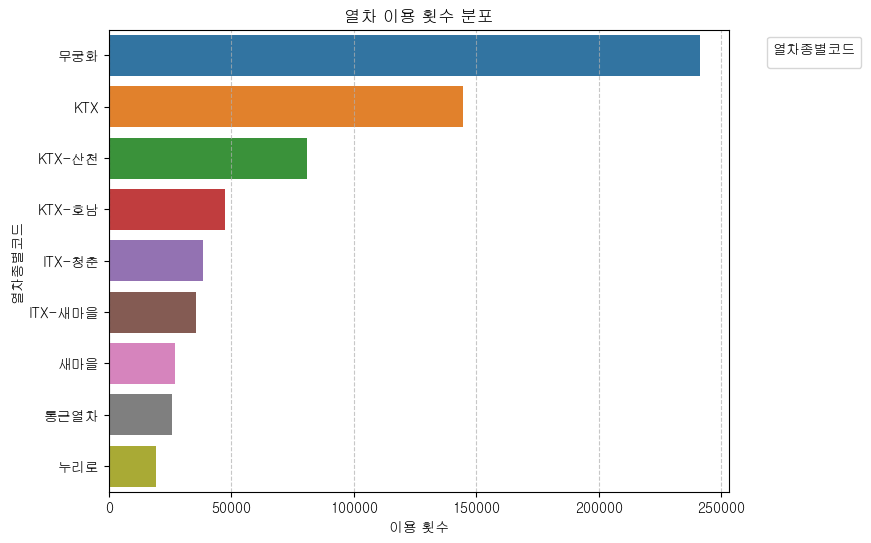

In [95]:
file_path = "./train_data/data_v2/19_21_v5.csv"
df = pd.read_csv(file_path)

# "열차종별코드" 값 개수 확인
train_type_counts = df["열차종별코드"].value_counts()

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(
    x=train_type_counts.values,  # 이용 횟수
    y=train_type_counts.index,   # 열차종별코드
    hue=train_type_counts.index  # 색상 구분
)

# 라벨 및 제목 추가
plt.xlabel("이용 횟수")
plt.ylabel("열차종별코드")
plt.title("열차 이용 횟수 분포")
plt.legend(title="열차종별코드", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# plt.figure(figsize=(8, 6))
# sns.barplot(
#     x=train_type_counts.values, 
#     y=train_type_counts.index, 
#     hue=train_type_counts.index,  # hue 추가하여 legend 활성화
#     dodge=False,  # 막대 그래프가 겹치지 않도록 설정
#     palette="viridis"
# )

# # 범례 추가
# plt.legend(title="열차종별코드", bbox_to_anchor=(1.05, 1), loc='upper left')

# # 라벨 및 제목 추가
# plt.xlabel("이용 횟수")
# plt.ylabel("열차종별코드")
# plt.title("열차 이용 횟수 분포")
# plt.grid(axis="x", linestyle="--", alpha=0.7)
# plt.show()

C:\Users\sangi\AppData\Local\Temp\ipykernel_20076\574926433.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


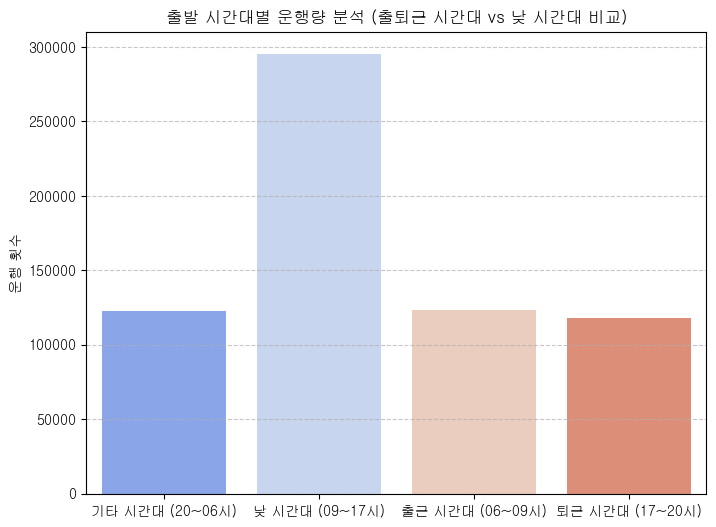

In [96]:
file_path = "./train_data/data_v2/19_21_v5.csv"
df = pd.read_csv(file_path)

# "열차시발시각"에서 시간(HH)만 추출
df["출발_시간"] = df["열차시발시각"].str[:2].astype(int)

# 시간대별 범주 생성 (출퇴근, 낮, 기타)
def categorize_time(hour):
    if 6 <= hour < 9:
        return "출근 시간대 (06~09시)"
    elif 9 <= hour < 17:
        return "낮 시간대 (09~17시)"
    elif 17 <= hour < 20:
        return "퇴근 시간대 (17~20시)"
    else:
        return "기타 시간대 (20~06시)"

df["시간대"] = df["출발_시간"].apply(categorize_time)

# 시간대별 운행량 분석
time_period_counts = df["시간대"].value_counts().sort_index()

plt.figure(figsize=(8, 6))
sns.barplot(
    x=time_period_counts.index, 
    y=time_period_counts.values, 
    palette="coolwarm"
)

plt.xlabel("")
plt.ylabel("운행 횟수")
plt.title("출발 시간대별 운행량 분석 (출퇴근 시간대 vs 낮 시간대 비교)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


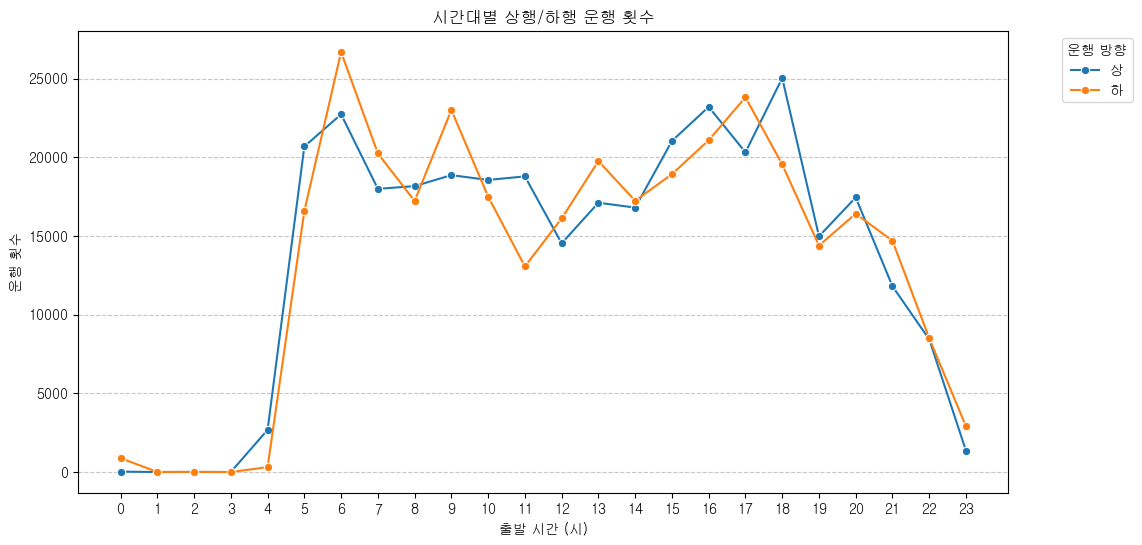

In [97]:
file_path = "./train_data/data_v2/19_21_v5.csv"
df = pd.read_csv(file_path)

# "열차시발시각"에서 시간만 추출
df["출발시간"] = pd.to_datetime(df["열차시발시각"], format="%H:%M:%S", errors="coerce").dt.hour

# 상행과 하행 운행 횟수 집계
time_counts = df.groupby(["출발시간", "상행하행구분코드"]).size().reset_index(name="운행 횟수")

plt.figure(figsize=(12, 6))
sns.lineplot(data=time_counts, x="출발시간", y="운행 횟수", hue="상행하행구분코드", marker="o")

plt.xlabel("출발 시간 (시)")
plt.ylabel("운행 횟수")
plt.title("시간대별 상행/하행 운행 횟수")
plt.xticks(range(0, 24))  # X축을 0~23시로 설정
plt.legend(title="운행 방향", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


C:\Users\sangi\AppData\Local\Temp\ipykernel_20076\2548254079.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


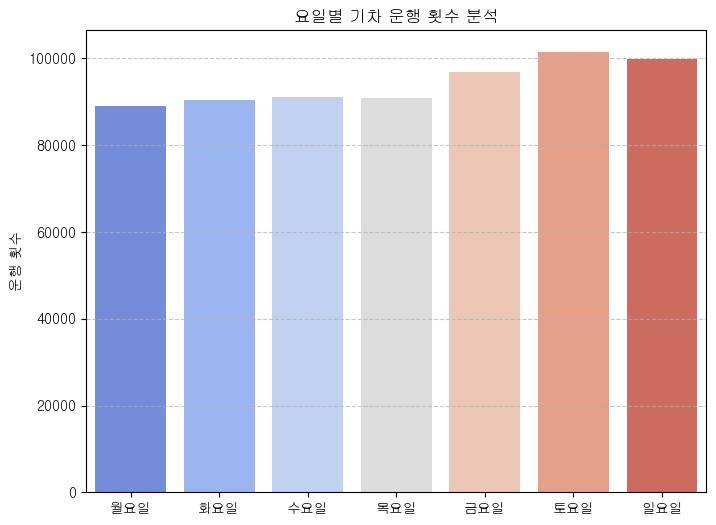

In [98]:
file_path = "./train_data/data_v2/19_21_v5.csv"
df = pd.read_csv(file_path)

# 요일 순서를 월요일~일요일로 정렬
weekday_order = ["월요일", "화요일", "수요일", "목요일", "금요일", "토요일", "일요일"]

# 요일별 기차 이용 횟수 계산 후 정렬
weekday_counts = df["요일"].value_counts().reindex(weekday_order)

plt.figure(figsize=(8, 6))
sns.barplot(
    x=weekday_counts.index, 
    y=weekday_counts.values, 
    palette="coolwarm"
)

plt.xlabel("")
plt.ylabel("운행 횟수")
plt.title("요일별 기차 운행 횟수 분석")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

---

### 공항

In [111]:
file_path = "./train_data/data_v2/19_21_v5.csv"
df = pd.read_csv(file_path)

# "공항"이 포함된 행을 필터링 (빠른 검색)
df_airport = df[df.astype(str).apply(lambda x: x.str.contains("공항", na=False)).any(axis=1)]
display(df_airport.head())

,운행일자,상행하행구분코드,열차종별코드,운행구분코드,시발역코드,열차시발시각,종착역코드,열차종착시각,열차속성코드,주운행성코드,요일
126394,2019-06-24,하,KTX,현시각,서울,00:45:00,인천공항T2,02:00:00,일반,공항철도,월요일
126395,2019-06-24,상,KTX,현시각,인천공항T2,02:30:00,고양기지,03:50:00,일반,고양기지선,월요일
137363,2019-07-09,상,KTX,정기,목포,10:03:00,인천공항T2,13:17:00,일반,호남선,화요일
137364,2019-07-09,하,KTX,정기,인천공항T2,09:28:00,목포,13:01:00,일반,호남선,화요일
137367,2019-07-09,상,KTX,정기,목포,12:58:00,인천공항T2,16:31:00,일반,호남선,화요일


In [100]:
file_path = "./train_data/data_v2/19_21_v5.csv"
df = pd.read_csv(file_path)

# "공항"이 포함된 행을 필터링
df_airport = df[df.astype(str).apply(lambda x: x.str.contains("공항", na=False)).any(axis=1)]

# 저장할 디렉토리 확인 및 생성
output_dir = "./train_data/data_v2"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

output_airport_path = os.path.join(output_dir, "19_21_v5_airport.csv")
df_airport.to_csv(output_airport_path, index=False, encoding="utf-8-sig")

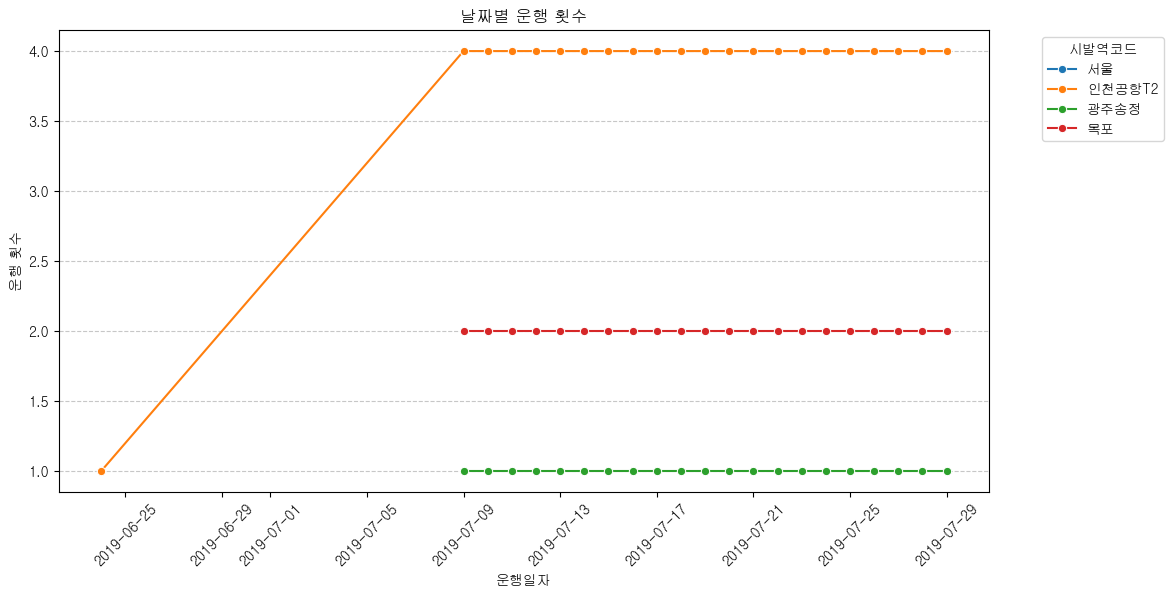

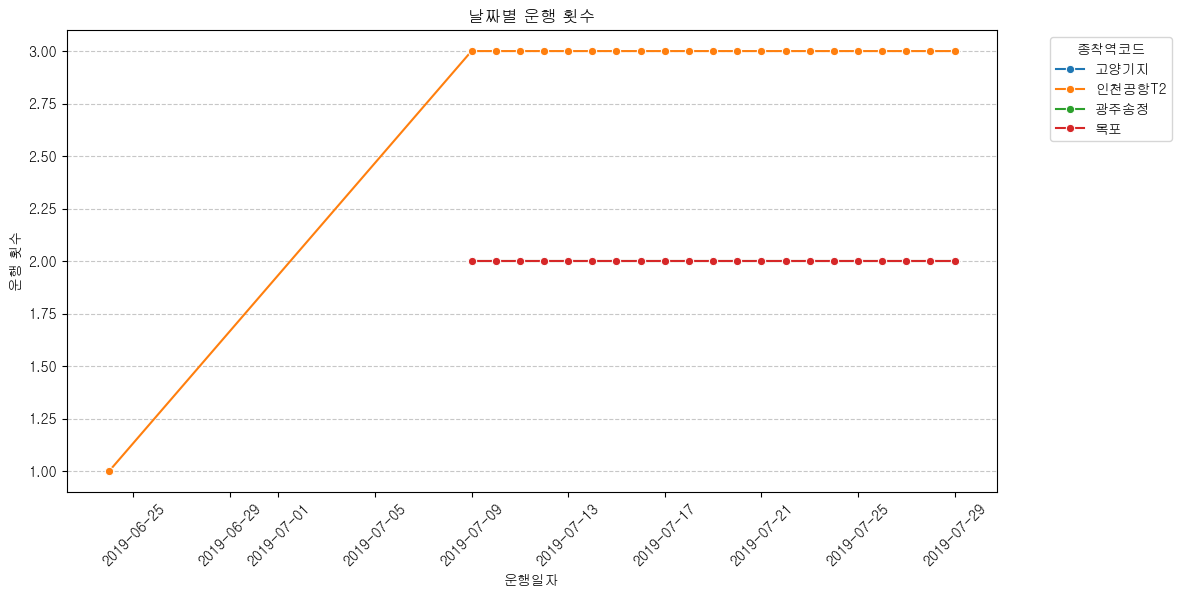

In [101]:

file_path = "./train_data/data_v2/19_21_v5_airport.csv"
df_airport = pd.read_csv(file_path)

# "운행일자"를 날짜 형식으로 변환
df_airport["운행일자"] = pd.to_datetime(df_airport["운행일자"], format="%Y-%m-%d")

# 날짜별 시발역코드 운행 횟수 계산
departure_counts = df_airport.groupby(["운행일자", "시발역코드"]).size().reset_index(name="운행 횟수")

# 날짜별 종착역코드 운행 횟수 계산
arrival_counts = df_airport.groupby(["운행일자", "종착역코드"]).size().reset_index(name="운행 횟수")

# 시각화 - 시발역코드 기준
plt.figure(figsize=(12, 6))
sns.lineplot(data=departure_counts, x="운행일자", y="운행 횟수", hue="시발역코드", marker="o")

plt.xlabel("운행일자")
plt.ylabel("운행 횟수")
plt.title("날짜별 운행 횟수")
plt.legend(title="시발역코드", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 시각화 - 종착역코드 기준
plt.figure(figsize=(12, 6))
sns.lineplot(data=arrival_counts, x="운행일자", y="운행 횟수", hue="종착역코드", marker="o")

plt.xlabel("운행일자")
plt.ylabel("운행 횟수")
plt.title("날짜별 운행 횟수")
plt.legend(title="종착역코드", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


---

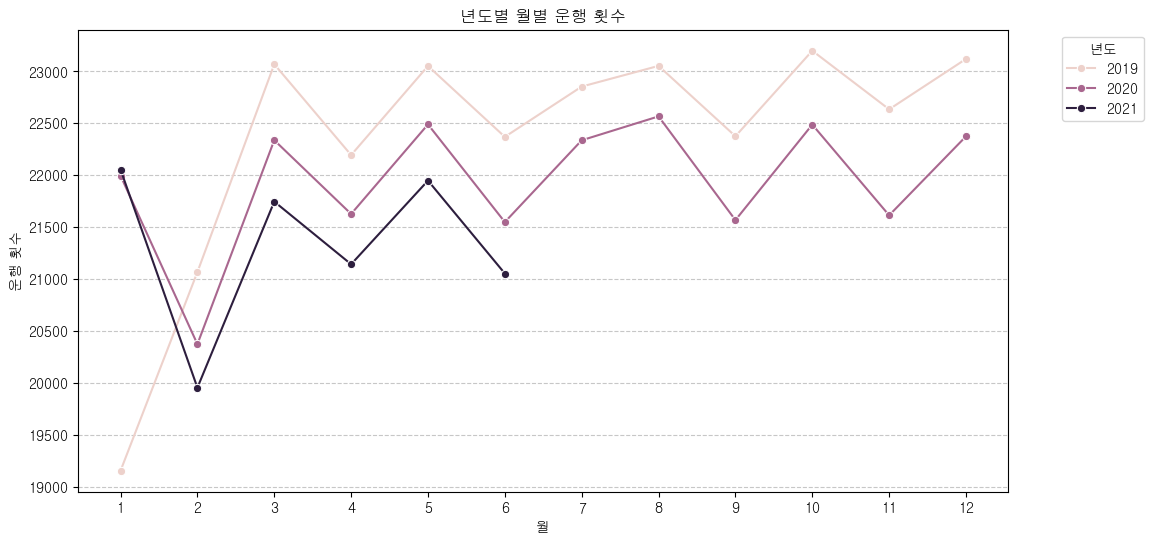

In [102]:
file_path = "./train_data/data_v2/19_21_v5.csv"
df = pd.read_csv(file_path)

#"운행일자"를 날짜 형식으로 변환
df["운행일자"] = pd.to_datetime(df["운행일자"], format="%Y-%m-%d")

# 년도 및 월별 운행 횟수 계산
df["년"] = df["운행일자"].dt.year
df["월"] = df["운행일자"].dt.month

# 년도별, 월별 운행 횟수 집계
monthly_counts = df.groupby(["년", "월"]).size().reset_index(name="운행 횟수")

# 시각화 (년도별 월별 운행 횟수)
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_counts, x="월", y="운행 횟수", hue="년", marker="o")

plt.xlabel("월")
plt.ylabel("운행 횟수")
plt.title("년도별 월별 운행 횟수")
plt.xticks(range(1, 13))  # X축을 1~12월로 설정
plt.legend(title="년도", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


C:\Users\sangi\AppData\Local\Temp\ipykernel_20076\1284316826.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


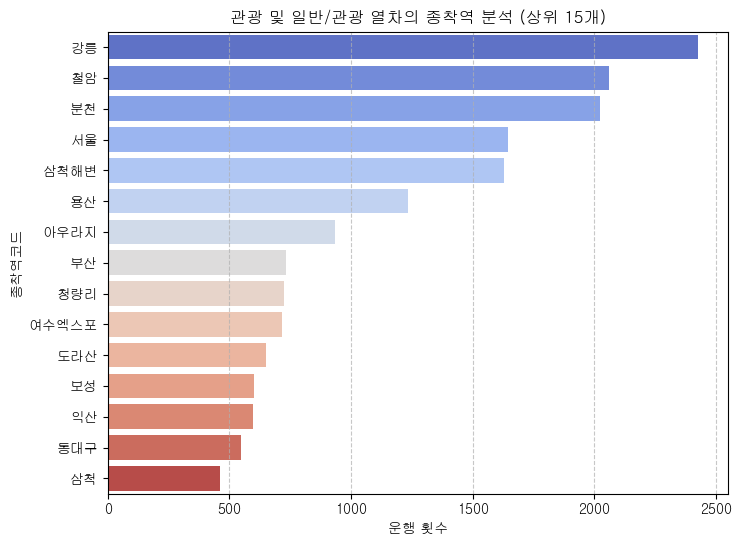

In [103]:
file_path = "./train_data/data_v2/19_21_v5.csv"
df = pd.read_csv(file_path)

# "열차속성코드"가 "관광" 또는 "일반/관광"인 경우 필터링
df_tour = df[df["열차속성코드"].isin(["관광", "일반/관광"])]

# 종착역코드별 운행 횟수 집계 (상위 15개만 선택)
arrival_counts = df_tour["종착역코드"].value_counts().head(15)

# 시각화 (상위 15개 종착역 분석)
plt.figure(figsize=(8, 6))
sns.barplot(
    x=arrival_counts.values, 
    y=arrival_counts.index, 
    palette="coolwarm"
)

plt.xlabel("운행 횟수")
plt.ylabel("종착역코드")
plt.title("관광 및 일반/관광 열차의 종착역 분석 (상위 15개)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

C:\Users\sangi\AppData\Local\Temp\ipykernel_20076\2629069159.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


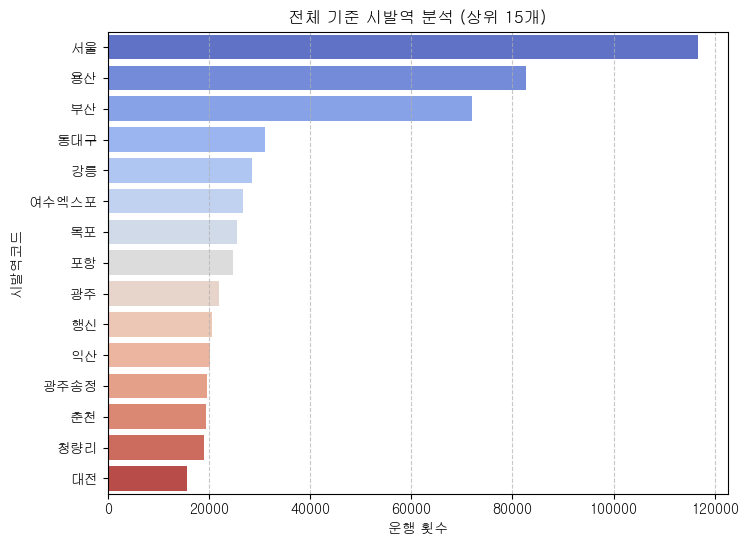

In [104]:
file_path = "./train_data/data_v2/19_21_v5.csv"
use_cols = ["시발역코드"]
df = pd.read_csv(file_path, usecols=use_cols)

departure_counts_top = df["시발역코드"].value_counts().head(15)

plt.figure(figsize=(8, 6))
sns.barplot(
    x=departure_counts_top.values, 
    y=departure_counts_top.index, 
    palette="coolwarm"
)

plt.xlabel("운행 횟수")
plt.ylabel("시발역코드")
plt.title("전체 기준 시발역 분석 (상위 15개)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# departure_counts_bottom = df["시발역코드"].value_counts().tail(15)

# plt.figure(figsize=(8, 6))
# sns.barplot(
#     x=departure_counts_bottom.values, 
#     y=departure_counts_bottom.index, 
#     palette="coolwarm"
# )
# plt.xlabel("운행 횟수")
# plt.ylabel("시발역코드")
# plt.title("전체 기준 시발역 분석 (하위 15개)")
# plt.grid(axis="x", linestyle="--", alpha=0.7)
# plt.show()


C:\Users\sangi\AppData\Local\Temp\ipykernel_20076\1081604798.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


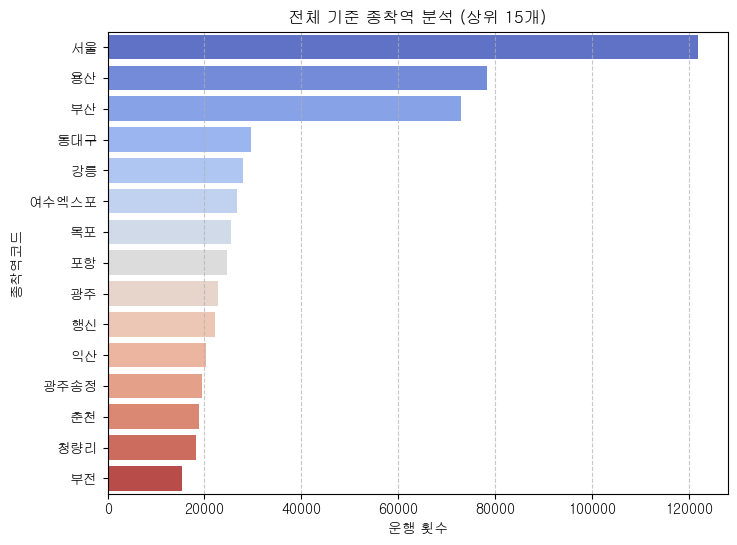

In [105]:
file_path = "./train_data/data_v2/19_21_v5.csv"
use_cols = ["종착역코드"]
df = pd.read_csv(file_path, usecols=use_cols)

departure_counts_top = df["종착역코드"].value_counts().head(15)

plt.figure(figsize=(8, 6))
sns.barplot(
    x=departure_counts_top.values, 
    y=departure_counts_top.index, 
    palette="coolwarm"
)

plt.xlabel("운행 횟수")
plt.ylabel("종착역코드")
plt.title("전체 기준 종착역 분석 (상위 15개)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# departure_counts_bottom = df["종착역코드"].value_counts().tail(15)

# plt.figure(figsize=(8, 6))
# sns.barplot(
#     x=departure_counts_bottom.values, 
#     y=departure_counts_bottom.index, 
#     palette="coolwarm"
# )
# plt.xlabel("운행 횟수")
# plt.ylabel("종착역코드")
# plt.title("전체 기준 종착역 분석 (하위 15개)")
# plt.grid(axis="x", linestyle="--", alpha=0.7)
# plt.show()

C:\Users\sangi\AppData\Local\Temp\ipykernel_20076\47189283.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


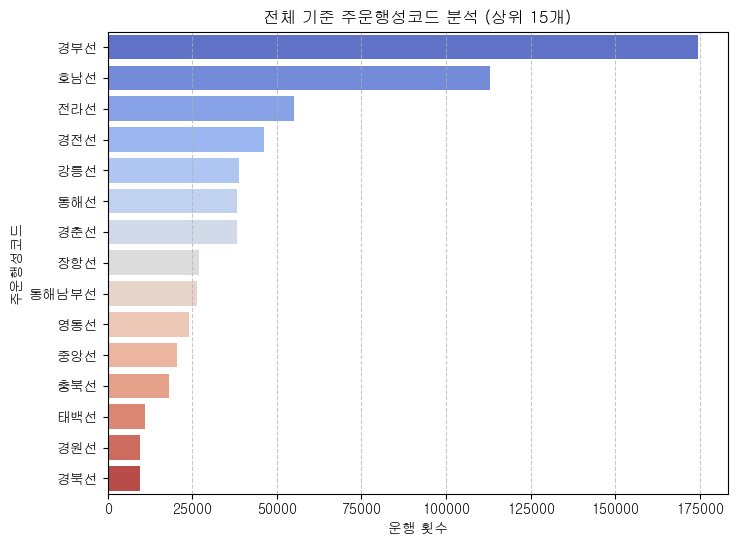

In [106]:
file_path = "./train_data/data_v2/19_21_v5.csv"

# "주운행성코드" 컬럼만 선택하여 데이터를 부분적으로 로드 (메모리 최적화)
chunksize = 100000  # 10만 개씩 로드하여 처리
all_data = []

for chunk in pd.read_csv(file_path, usecols=["주운행성코드"], chunksize=chunksize):
    all_data.append(chunk)

# 전체 데이터를 하나의 DataFrame으로 합치기
df_main_line = pd.concat(all_data, ignore_index=True)

main_line_counts_top = df_main_line["주운행성코드"].value_counts().head(15)

plt.figure(figsize=(8, 6))
sns.barplot(
    x=main_line_counts_top.values, 
    y=main_line_counts_top.index, 
    palette="coolwarm"
)
plt.xlabel("운행 횟수")
plt.ylabel("주운행성코드")
plt.title("전체 기준 주운행성코드 분석 (상위 15개)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()